In [489]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [64]:
movies_db = pd.read_csv('Movies_DB_clean.csv',index_col=0)

In [66]:
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male


In [601]:
movies_db['Votes (Thousands)'] = movies_db['Votes'] / 1000

In [602]:
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Revenue_Classification,Genre_1,Genre_2,Genre_3,Votes (Thousands)
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,high,Action,Adventure,Sci-Fi,757.074
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,average,Adventure,Mystery,Sci-Fi,485.820
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,high,Horror,Thriller,None,157.606
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,high,Animation,Comedy,Family,60.545
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,high,Action,Adventure,Fantasy,393.727


# revenue 

In [67]:
revenue_stats = movies_db['Revenue (Millions)'].describe()
revenue_stats.head(10)

count    756.000000
mean      94.058519
std      106.309789
min        0.010000
25%       25.022500
50%       58.315000
75%      127.407500
max      936.630000
Name: Revenue (Millions), dtype: float64

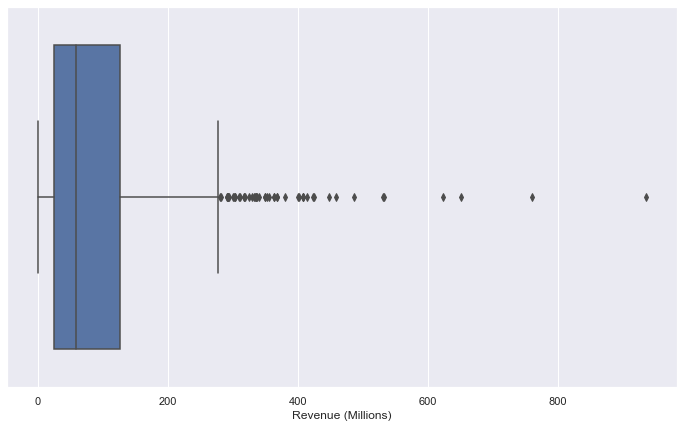

In [324]:
sns.set(style= 'darkgrid')

f, ax = plt.subplots(figsize=(12,7))
ax = sns.boxplot(x= movies_db['Revenue (Millions)'])

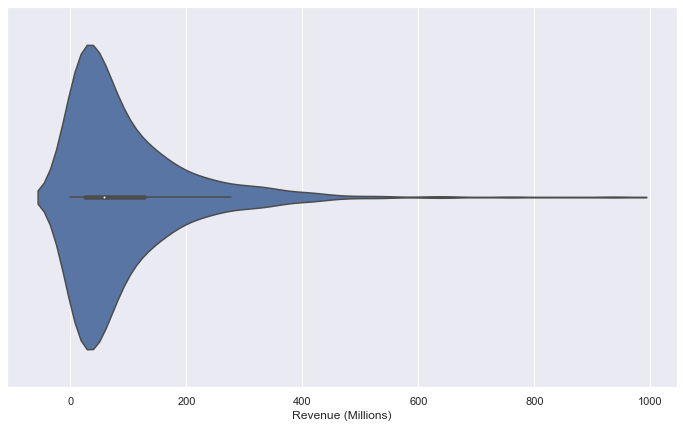

In [325]:
f, ax = plt.subplots(figsize=(12,7))
sns.violinplot("Revenue (Millions)", data = movies_db)
plt.show()

In [69]:
# dispersion of the data, the data is very spread out
# bin the data based on the statistics summary
# up to 25% percentile = low revenue
# 25% to 75% percentile = average revenue
# 75% to mean + 3std = high revenue
# outliers = top revenue

rev_bins = ['low','average','high','top']

rev_binned = pd.cut(movies_db['Revenue (Millions)'], [0,revenue_stats[4],revenue_stats[6],(revenue_stats[1] + 3 * revenue_stats[2]),revenue_stats[7]],labels = rev_bins)

In [70]:
# add revenue classification column to dataframe
movies_db['Revenue_Classification'] = rev_binned

In [71]:
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Revenue_Classification
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,high
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,high
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,high
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,high


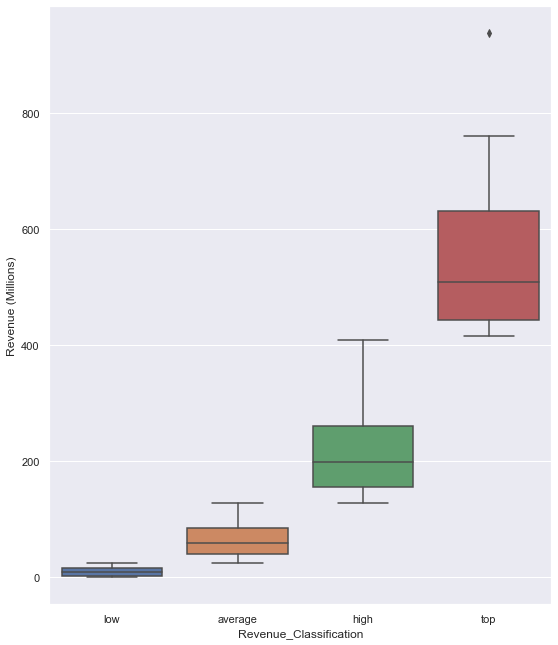

In [367]:
sns.set(style= 'darkgrid')
f, ax = plt.subplots(figsize=(9,11))
ax = sns.boxplot(x= movies_db['Revenue_Classification'], y= movies_db['Revenue (Millions)'])

# Top 25 highest-grossing movies

In [76]:
top25_revenue_movie = movies_db.sort_values(by = ['Revenue (Millions)'], ascending = False)
top25_revenue_movie.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Revenue_Classification
37,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,J.J.,Abrams,male,top
68,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,James,Cameron,male,top
67,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,Colin,Trevorrow,male,top
58,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,Joss,Whedon,male,top
40,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Christopher,Nolan,male,top
10,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,Gareth,Edwards,male,top
93,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0,Andrew,Stanton,male,top
75,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0,Joss,Whedon,male,top
97,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,Christopher,Nolan,male,top
457,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0,Francis,Lawrence,male,top


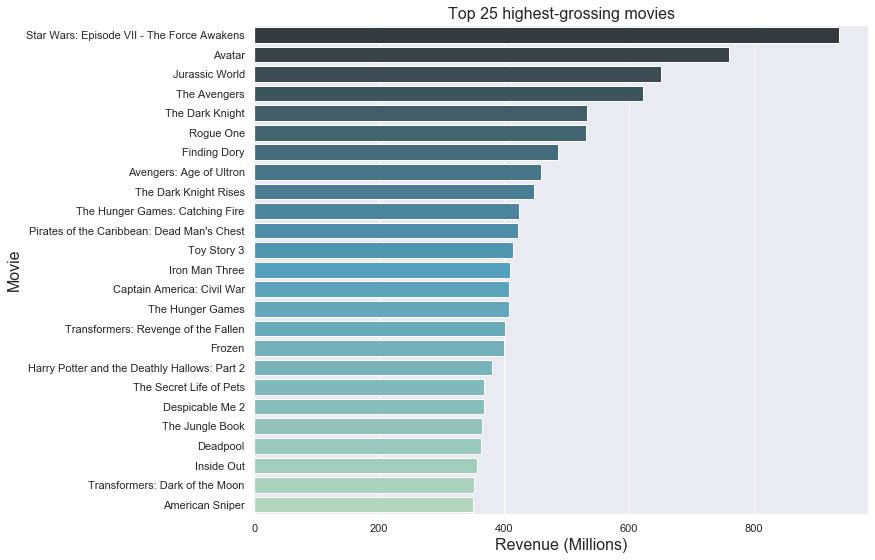

In [597]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(11,9))

ax = sns.barplot(x= 'Revenue (Millions)', y= 'Title', data= top25_revenue_movie[:25], palette= 'GnBu_d')
plt.title("Top 25 highest-grossing movies",fontsize =16)
plt.xlabel("Revenue (Millions)",fontsize =16)
plt.ylabel("Movie",fontsize =16)
#plt.rcParams["axes.labelsize"] = 10
#plt.xticks(rotation = 90)
sns.set(font_scale=1)

plt.show()

In [117]:
top25_revenue_movie[['Title','Genre','Director_genre','Actors','Rating']][:25]

,Title,Genre,Director_genre,Actors,Rating
37,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",male,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",8.1
68,Avatar,"Action,Adventure,Fantasy",male,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8
67,Jurassic World,"Action,Adventure,Sci-Fi",male,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",7.0
58,The Avengers,"Action,Sci-Fi",male,"Robert Downey Jr., Chris Evans, Scarlett Johan...",8.1
40,The Dark Knight,"Action,Crime,Drama",male,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",9.0
10,Rogue One,"Action,Adventure,Sci-Fi",male,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",7.9
93,Finding Dory,"Animation,Adventure,Comedy",male,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",7.4
75,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",male,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",7.4
97,The Dark Knight Rises,"Action,Thriller",male,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",8.5
457,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",male,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",7.6


# Movies per director genre

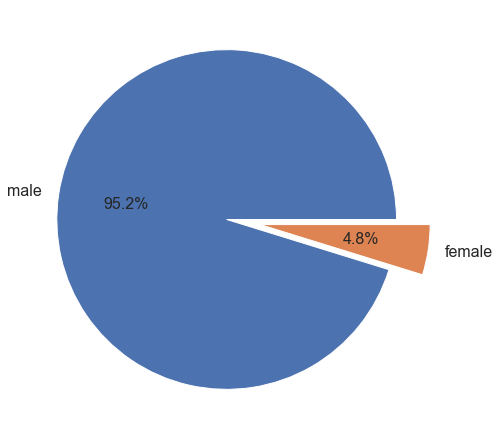

In [396]:
labels = movies_db['Director_genre'].value_counts().index
sizes = (movies_db['Director_genre'].value_counts().values/len(movies_db['Director_genre']))*100

fig1,ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode = (0,0.2),labels = labels,autopct='%1.1f%%',textprops={'fontsize': 16})
plt.tight_layout()
plt.show()

# Revenue VS Director Genre

In [ ]:
revenue_dir_genre = movies_db[['Revenue (Millions)','Director_genre']].sort_values(by=['Revenue (Millions)'],ascending=False)

In [ ]:
revenue_dir_genre.head()

In [ ]:
sns.catplot(x="Director_genre", y="Revenue (Millions)", jitter=False, data=movies_db)

# Rating and Revenue

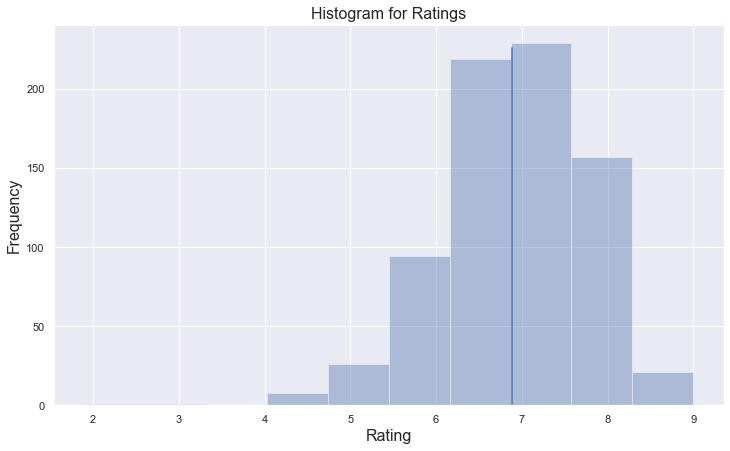

In [357]:
# histogram for ratings
f, ax = plt.subplots(figsize=(12,7))
fig = sns.distplot(movies_db['Rating'], bins=10, kde = False, rug= False)
plt.axvline(6.89,0,0.94)
plt.title("Histogram for Ratings",fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Rating', fontsize = 16)
plt.show()

In [120]:
# average rating
rat_mean = movies_db['Rating'].mean()
f'The average rating is {rat_mean}'

'The average rating is 6.893386243386244'

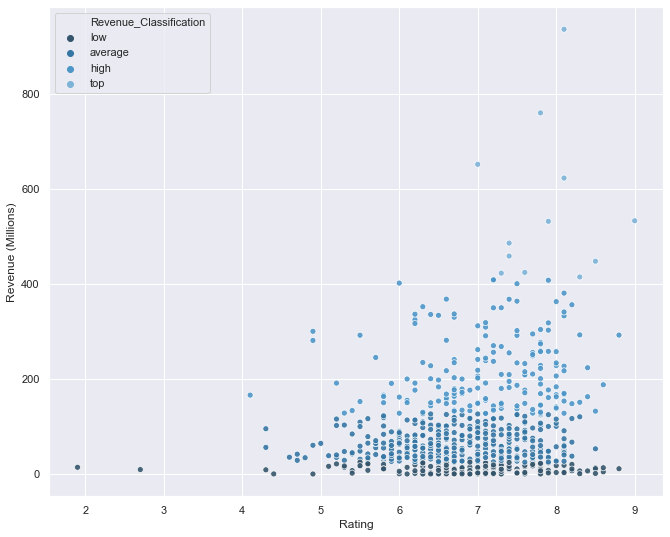

In [358]:
f, ax = plt.subplots(figsize=(11,9))
ax = sns.scatterplot(x= 'Rating', y= 'Revenue (Millions)', hue = 'Revenue_Classification', alpha = 0.9, data= movies_db, palette = 'Blues_d')

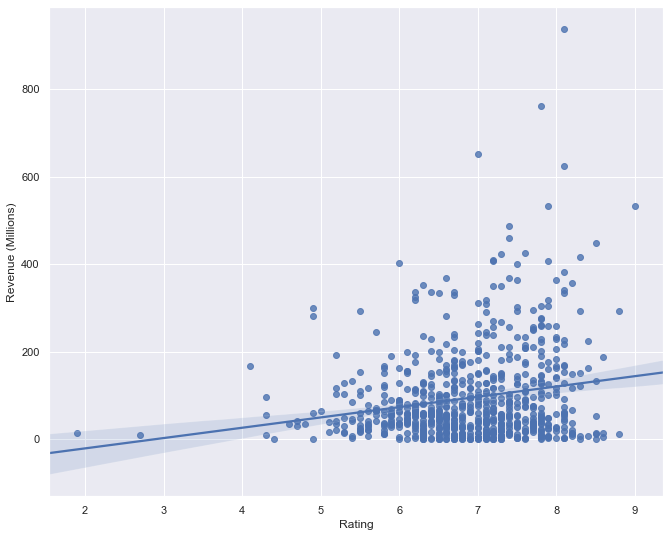

In [550]:

f, ax = plt.subplots(figsize=(11,9))
sns.regplot(x= 'Rating', y= 'Revenue (Millions)',  data= movies_db)#, palette = 'Blues_m')

In [ ]:
# no correlation at all, the relationship is very week

# Rating vs Votes

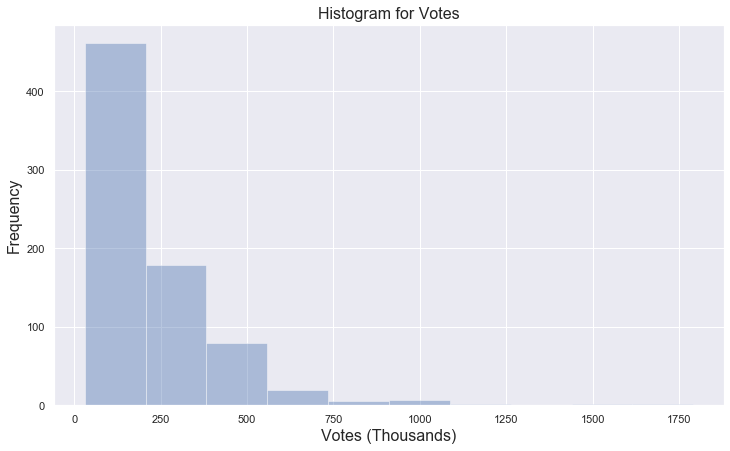

In [604]:
f, ax = plt.subplots(figsize=(12,7))
fig = sns.distplot(movies_db['Votes (Thousands)'], bins = 10, kde = False, rug= False)
plt.title("Histogram for Votes",fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('Votes (Thousands)', fontsize = 16)
plt.show()

In [647]:
rating_sorted = movies_db[['Rating','Votes (Thousands)']].sort_values(by=['Rating'])
rating_sorted = rating_sorted.loc[::-1]
rating_sorted = rating_sorted.reset_index()
rating_sorted = rating_sorted.drop('index',axis=1)
rating_sorted.head()

,Rating,Votes (Thousands)
0,9.0,1791.916
1,8.8,48.969
2,8.8,1583.625
3,8.6,34.110
4,8.6,557.965


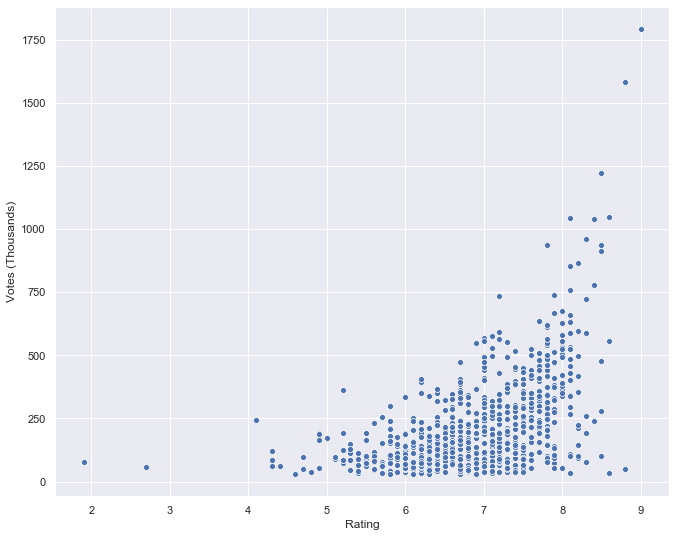

In [695]:
f, ax = plt.subplots(figsize=(11,9))
sns.scatterplot(x= 'Rating', y = 'Votes (Thousands)', data = rating_sorted)

In [694]:
loc, scale = stats.expon.fit(rating_sorted['Rating'])
n = stats.expon(loc=loc, scale=scale)
stats.kstest(rating_sorted['Rating'], n.cdf)

KstestResult(statistic=0.4660926627386884, pvalue=5.241256870978722e-151)

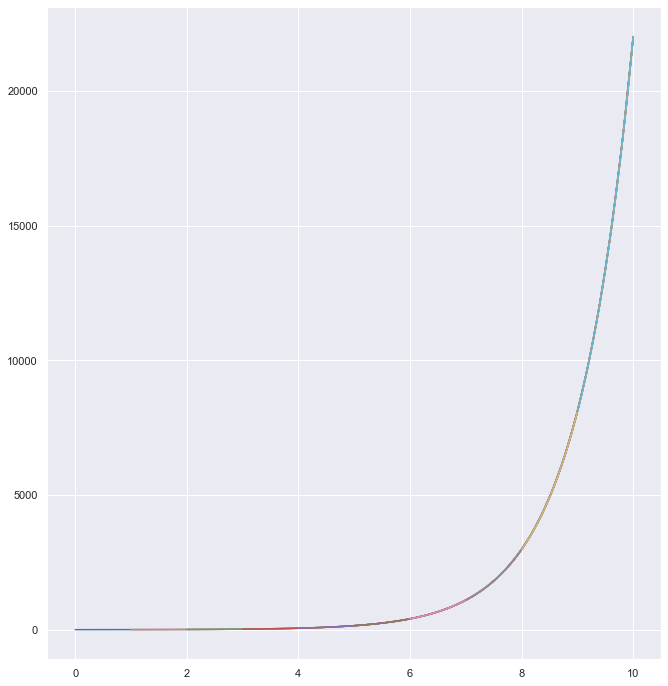

In [569]:
x = np.linspace(range(10),10)
y = np.exp(x)
plt.plot(x,y)
plt.show()

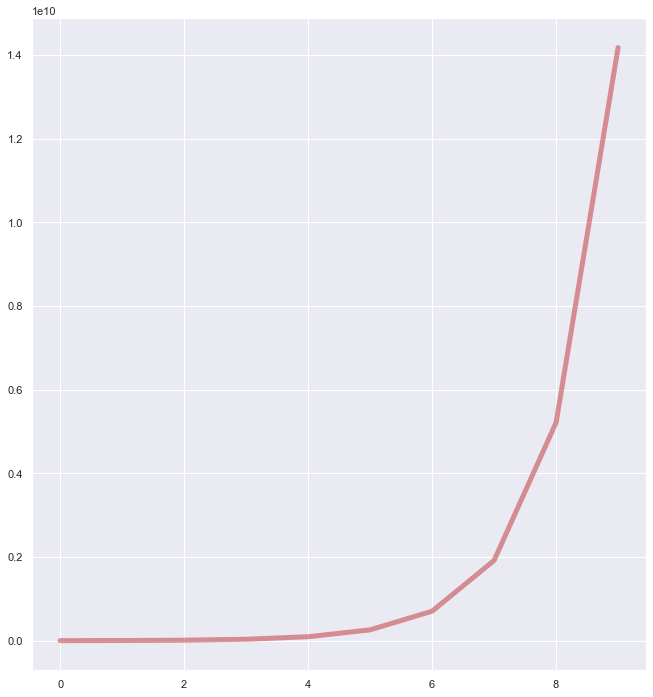

In [584]:
x = range(10)
fig, ax = plt.subplots(1,1)
ax.plot(x, np.exp(x) * 1750000,'r-', lw=5, alpha=0.6, label='expon pdf') 
plt.show()

In [689]:
# count votes per rating
votes_per_rating = movies_db.groupby('Rating').agg({'Votes':'sum'})
votes_per_rating['idx'] = list(range(len(votes_per_rating)))
#votes_per_rating = votes_per_rating.set_index('idx')
votes_per_rating.tail()


,Votes,idx
Rating,,
8.4,2054801,43
8.5,3931287,44
8.6,1639822,45
8.8,1632594,46
9.0,1791916,47


In [670]:
loc, scale = stats.expon.fit(rating_sorted['Rating'], floc=0)
print(loc)
print(scale)

0.0
6.893386243386243


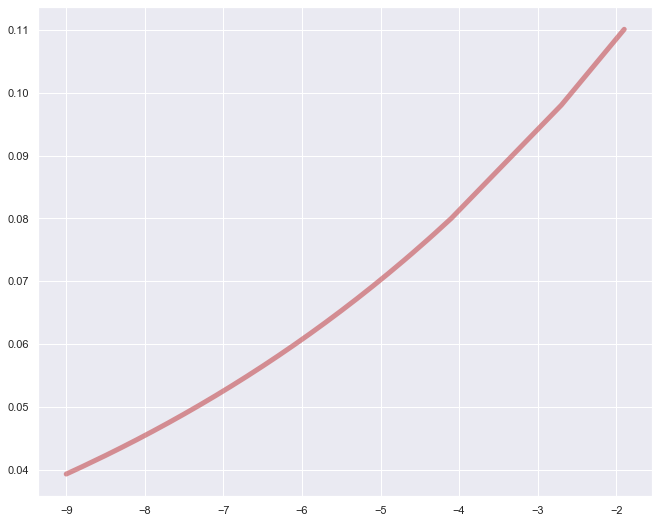

In [674]:
f, ax = plt.subplots(figsize=(11,9))
rat = rating_sorted['Rating']
ax2 = ax.plot(-rat, stats.expon.pdf(rat, loc = loc, scale = scale),'r-', lw=5, alpha=0.6, label='expon pdf')

#pdf(x, loc=0, scale=1)

In [652]:
#sns.barplot(x ='rating', y = 'votes',data = votes_per_rating, palette="GnBu_d")

"\n# define exponential function\ndef func(x,a,b,c):\n    return a * np.exp(-b * x) + c\n\n# define the data\nxdata = rating_sorted['']\nydata = \ny = 0.05 * np.exp(x)\nplt.plot(x,y)\nplt.show()\n\n#ax.invert_xaxis()\n"

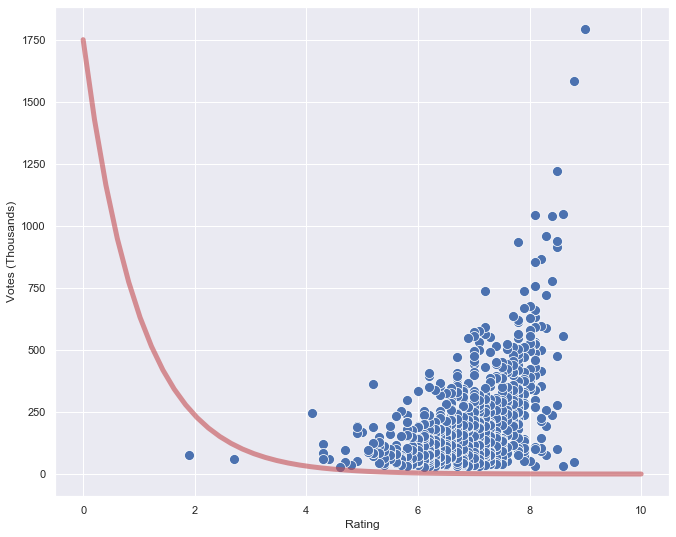

In [677]:
f, ax = plt.subplots(figsize=(11,9))
#pal = sns.palplot(sns.color_palette("RdBu", n_colors=7))
ax1 = sns.scatterplot(x= 'Rating', y= 'Votes (Thousands)',alpha = 1, data= rating_sorted, s=100)
#ax.plot(x, np.exp(x),'r-', lw=5, alpha=0.6, label='expon pdf') 

#ax2 = ax.plot(x, stats.expon.pdf(x,) * 1750,'r-', lw=5, alpha=0.6, label='expon pdf')
'''
# define exponential function
def func(x,a,b,c):
    return a * np.exp(-b * x) + c

# define the data
xdata = rating_sorted['']
ydata = 
y = 0.05 * np.exp(x)
plt.plot(x,y)
plt.show()

#ax.invert_xaxis()
'''

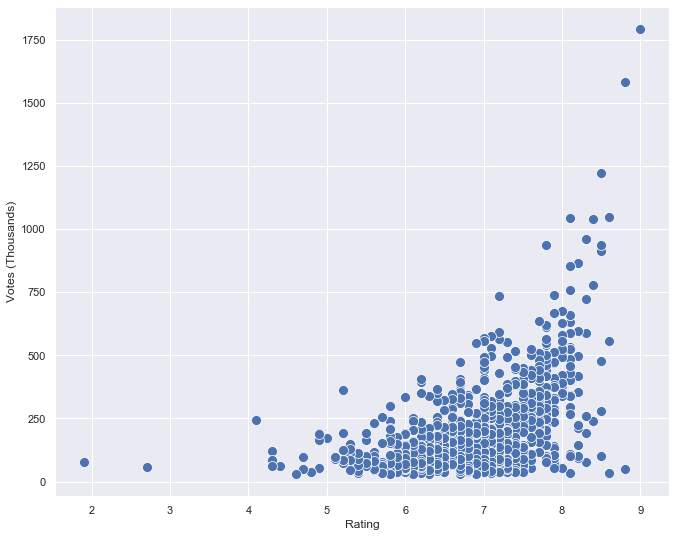

In [610]:
f, ax = plt.subplots(figsize=(11,9))
#pal = sns.palplot(sns.color_palette("RdBu", n_colors=7))
ax = sns.scatterplot(x= 'Rating', y= 'Votes (Thousands)',alpha = 1, data= rating_sorted, s=100)

# add exponential line

#param = stats.expon.fit(x)
##plt.hist(x, normed=True, color='white', hatch='/')
#plt.plot(grid, distr.pdf(np.linspace(0, 100, 10000), *param))

#'Blues_d'
#'RdBu'

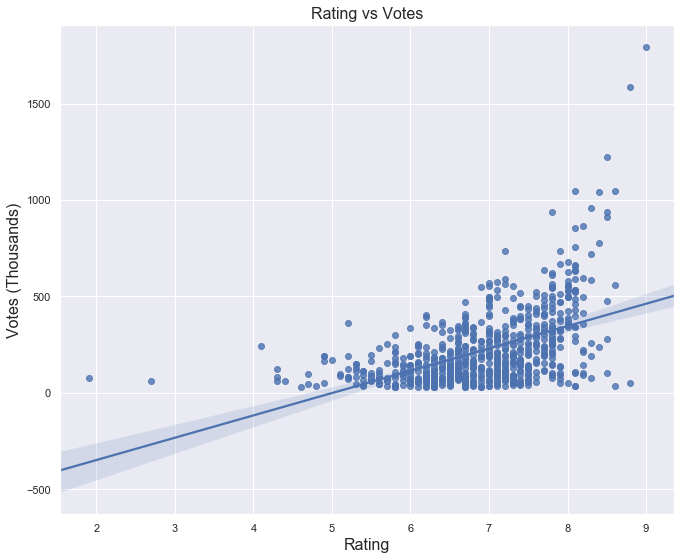

In [696]:

f, ax = plt.subplots(figsize=(11,9))
sns.regplot(x= 'Rating', y= 'Votes (Thousands)', data= movies_db)#, palette = 'Blues_m')
plt.title("Rating vs Votes",fontsize=16)
plt.ylabel('Votes (Thousands)', fontsize = 16)
plt.xlabel('Rating', fontsize = 16)
plt.show()

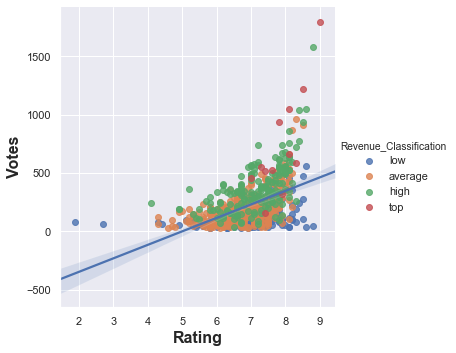

In [611]:
# in this case, we have a correlation slightly higher
#f, ax = plt.subplots(figsize=(11,9))
#sns.regplot(x= 'Rating', y= 'Votes',  data= movies_db)#, palette = 'Blues_m')

#f, ax = plt.subplots(figsize=(11,9))
g = sns.lmplot(x = "Rating", y = "Votes (Thousands)", hue = "Revenue_Classification", data = movies_db, fit_reg=False)
sns.regplot(x = "Rating", y = "Votes (Thousands)", data = movies_db, scatter = False, ax = g.axes[0, 0])
plt.rcParams['figure.figsize']=11,12
plt.xlabel('Rating',fontsize=16, fontweight="bold")
plt.ylabel('Votes',fontsize=16, fontweight="bold")
#plt.savefig('Linear Regression2.png',dpi=300)
plt.show()

In [ ]:
# kind of means movie with higher rating attract more number of votes.
# or does it have better rating because it has more votes?

# Revenue vs Votes

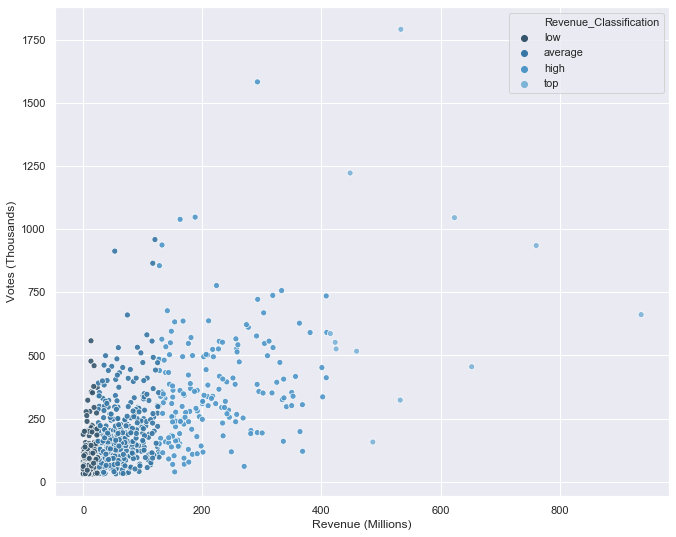

In [612]:
f, ax = plt.subplots(figsize=(11,9))
sns.scatterplot(x= 'Revenue (Millions)', y= 'Votes (Thousands)', hue = 'Revenue_Classification', alpha = 0.9, data= movies_db, palette = 'Blues_d')

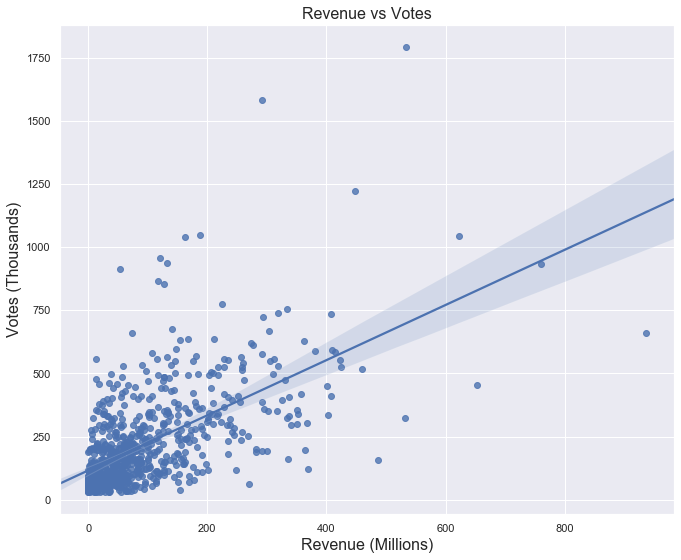

In [621]:
# again aparently there's no correlation or a very weak relationship
f, ax = plt.subplots(figsize=(11,9))
sns.regplot(x= 'Revenue (Millions)', y= 'Votes (Thousands)', data= movies_db)#, palette = 'Blues_m')
plt.title("Revenue vs Votes",fontsize=16)
plt.ylabel('Votes (Thousands)', fontsize = 16)
plt.xlabel('Revenue (Millions)', fontsize = 16)
plt.show()

In [ ]:
# to some point, we can kind of say that more votes mean more revenue

# Rating and votes over the years

In [197]:
# no. of movies over the years
movies_years = movies_db.groupby('Year').agg('count')['Rank']
movies_years.head()

Year
2006    42
2007    48
2008    51
2009    47
2010    57
Name: Rank, dtype: int64

In [201]:
# rating over the years
rating_years = movies_db.groupby('Year').agg({'Rating':'mean'})
rating_years.head()

,Rating
Year,
2006,7.130952
2007,7.175000
2008,6.778431
2009,6.929787
2010,6.894737


In [614]:
# votes over the years
votes_years = movies_db.groupby('Year').agg({'Votes (Thousands)':'mean'})
votes_years.head()

,Votes (Thousands)
Year,
2006,275.016024
2007,260.963542
2008,279.656765
2009,265.747277
2010,261.082930


In [615]:
# merge rating and year
over_years_merged = pd.merge(votes_years,rating_years, on = 'Year')
over_years_merged.head()

,Votes (Thousands),Rating
Year,,
2006,275.016024,7.130952
2007,260.963542,7.175000
2008,279.656765,6.778431
2009,265.747277,6.929787
2010,261.082930,6.894737


In [210]:
# add with no. of movies
over_years_merged['no. of movies'] = movies_years
over_years_merged.head()

,Votes,Rating,no. of movies
Year,,,
2006,275016.023810,7.130952,42
2007,260963.541667,7.175000,48
2008,279656.764706,6.778431,51
2009,265747.276596,6.929787,47
2010,261082.929825,6.894737,57


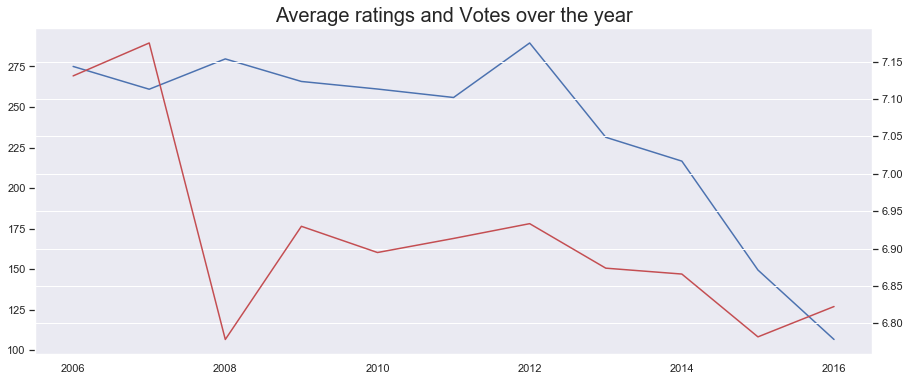

In [616]:
sns.set()
f,ax = plt.subplots(figsize=(15,6))
ax = sns.lineplot(data = over_years_merged['Votes (Thousands)'])
ax2 = ax.twinx()
ax2 = sns.lineplot(data = over_years_merged['Rating'], ax=ax2,color='r')
plt.title("Average ratings and Votes over the year",fontsize =20)
ax.grid(False)
#plt.ylabel("Average Rating",'Average Votes')

plt.show()

# Top Genres

In [274]:
# create movies genre list
movies_genre = movies_db['Genre'].str.split(",").tolist()

# flatten the list
movies_genre_flat = [i for sublist in movies_genre for i in sublist]

# print(movies_genre_flat)

# unique genres list
genre_unique = list(set(movies_genre_flat))

# count how many movies of each gender
count_movies_genre = [movies_genre_flat.count(i) for i in genre_unique]

print(len(genre_unique))
print(len(count_movies_genre))

20
20


In [449]:
# create dataframe

genre_counts = pd.DataFrame()
genre_counts["genre"] = genre_unique
genre_counts["counts"] = count_movies_genre
genre_counts = genre_counts.sort_values(by=['counts'], ascending=False)

genre_counts.head(20)

,genre,counts
11,Drama,356
17,Action,267
7,Adventure,240
6,Comedy,220
4,Thriller,132
3,Crime,119
2,Romance,107
13,Sci-Fi,104
19,Fantasy,88
14,Mystery,85


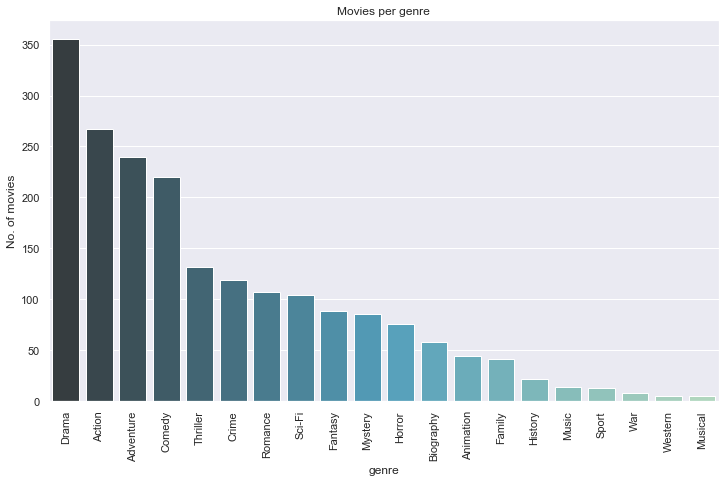

In [339]:
# plot bar char
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x ='genre', y = 'counts',data = genre_counts, palette="GnBu_d")

plt.title("Movies per genre")
plt.ylabel("No. of movies")
plt.xticks(rotation = 90)

plt.show()

In [444]:
genre_others = genre_counts[genre_counts['counts'] > 100]
genre_others.head()

genre_others['genre'].tolist()

#genre_others['counts'].tolist()

['Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Thriller',
 'Crime',
 'Romance',
 'Sci-Fi']

In [448]:
genre_labels = ['Other','Sci-Fi','Romance','Crime','Thriller','Comedy','Adventure','Action','Drama']

genre_bins = [0, 100, 107, 119, 132, 220, 240, 267, 356]

genre_counts_binned = pd.cut(genre_counts['counts'], bins = genre_bins, labels = genre_labels)

ValueError: Bin labels must be one fewer than the number of bin edges

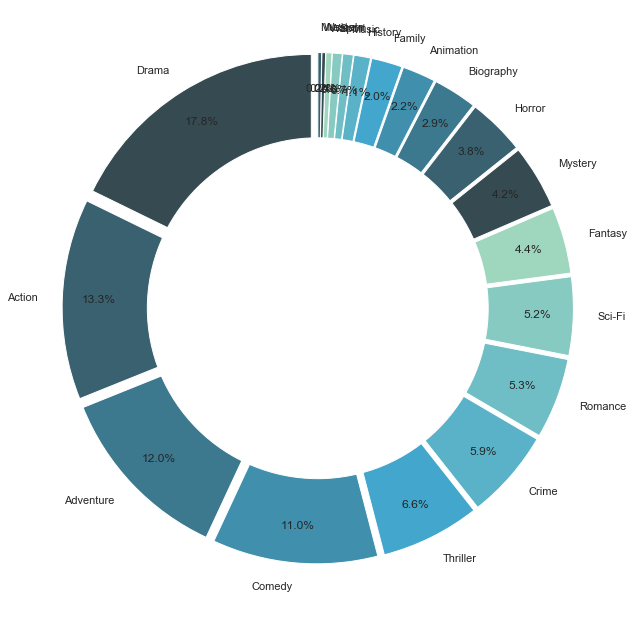

In [425]:
# pie chart
labels = genre_counts['genre']#.value_counts().index
sizes = (genre_counts['counts']/len(genre_counts['counts']))*100 #.value_counts().values

# colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = sns.mpl_palette("GnBu_d",n_colors = 9)

# explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,)

# plot
fig1, ax1 = plt.subplots(figsize=(9,9))

ax1.pie(sizes, colors = colors, labels = labels, autopct ='%1.1f%%',
        startangle = 90, pctdistance = 0.85, explode = explode)

# draw circle
centre_circle = plt.Circle((0,0), 0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

# Genre vs Rating

In [284]:
gender_split = movies_db['Genre'].str.split(",", n = 2, expand = True)
movies_db['Genre_1'] = gender_split[0]
movies_db['Genre_2'] = gender_split[1]
movies_db['Genre_3'] = gender_split[2]
movies_db.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Revenue_Classification,Genre_1,Genre_2,Genre_3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,high,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,average,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,high,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,high,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,high,Action,Adventure,Fantasy


In [307]:
movies_db.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Revenue_Classification,Genre_1,Genre_2,Genre_3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,James,Gunn,male,high,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Ridley,Scott,male,average,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,M.,Night Shyamalan,male,high,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Christophe,Lourdelet,male,high,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,David,Ayer,male,high,Action,Adventure,Fantasy


In [403]:
sort_rating = movies_db.sort_values(by=['Rating'],ascending=False)
sort_rating.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Director_Fname,Director_Lname,Director_genre,Revenue_Classification,Genre_1,Genre_2,Genre_3
40,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,Christopher,Nolan,male,top,Action,Crime,Drama
91,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN,Nitesh,Tiwari,male,low,Action,Biography,Drama
62,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,Christopher,Nolan,male,high,Action,Adventure,Sci-Fi
195,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0,Olivier,Nakache,male,low,Biography,Comedy,Drama
77,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0,Makoto,Shinkai,male,low,Animation,Drama,Fantasy


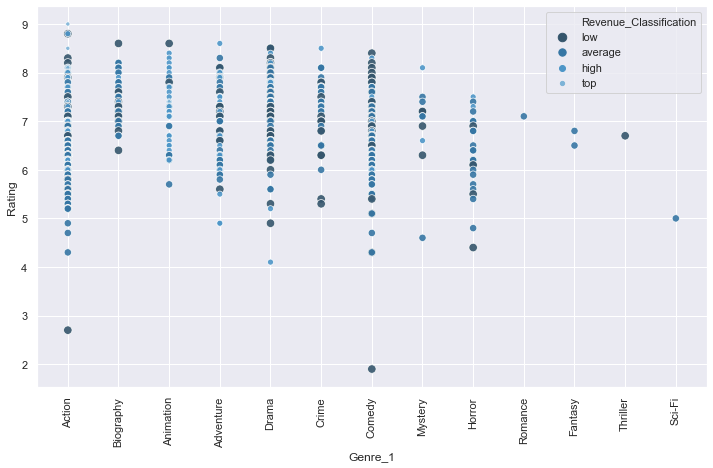

In [340]:
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x= 'Genre_1', y= 'Rating', hue = 'Revenue_Classification', size = 'Revenue_Classification', alpha = 0.9, data= sort_rating, palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.show()

In [419]:
avg_rat_genre = movies_db.groupby('Genre_1').agg({'Rating':'mean'}).sort_values(by=['Genre_1'])
avg_rat_genre.head()

,Rating
Genre_1,
Action,6.688716
Adventure,7.014925
Animation,7.329545
Biography,7.500000
Comedy,6.594615


In [420]:
avg_rat_genre = movies_db.groupby('Genre_1').agg({'Rating':'max'}).sort_values(by=['Genre_1'])
avg_rat_genre.head()

,Rating
Genre_1,
Action,9.0
Adventure,8.6
Animation,8.6
Biography,8.6
Comedy,8.4


In [421]:
avg_rat_genre = movies_db.groupby('Genre_1').agg({'Rating':'min'}).sort_values(by=['Genre_1'])
avg_rat_genre.head()

,Rating
Genre_1,
Action,2.7
Adventure,4.9
Animation,5.7
Biography,6.4
Comedy,1.9


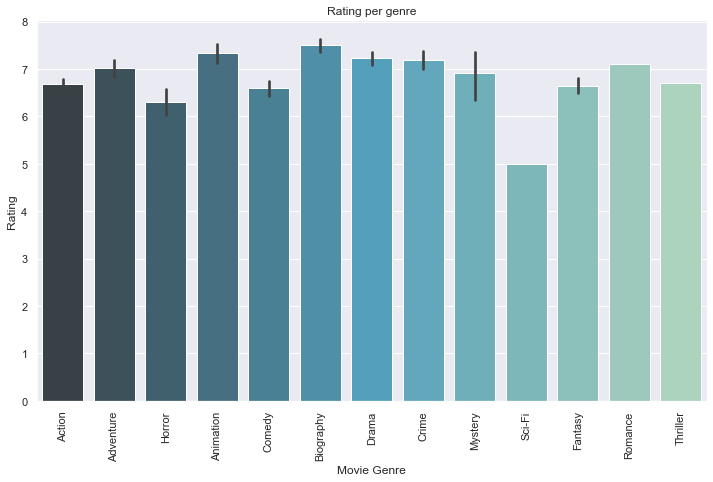

In [418]:
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x ='Genre_1', y = 'Rating',data = movies_db, palette="GnBu_d")#, order=list(sort_rating['Rating']))
plt.title("Rating per genre")
plt.xlabel("Movie Genre")
plt.xticks(rotation = 90)

plt.show()

# Genre vs Votes

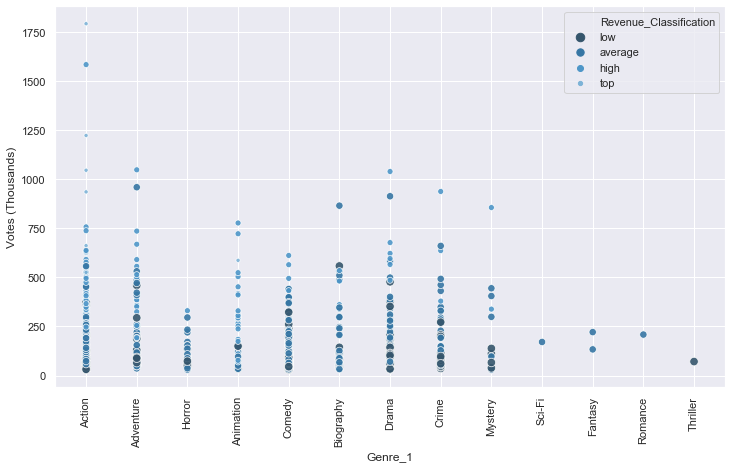

In [617]:
f, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x= 'Genre_1', y= 'Votes (Thousands)', hue = 'Revenue_Classification', size = 'Revenue_Classification', alpha = 0.9, data= movies_db, palette = 'Blues_d')
plt.xticks(rotation = 90)
plt.show()

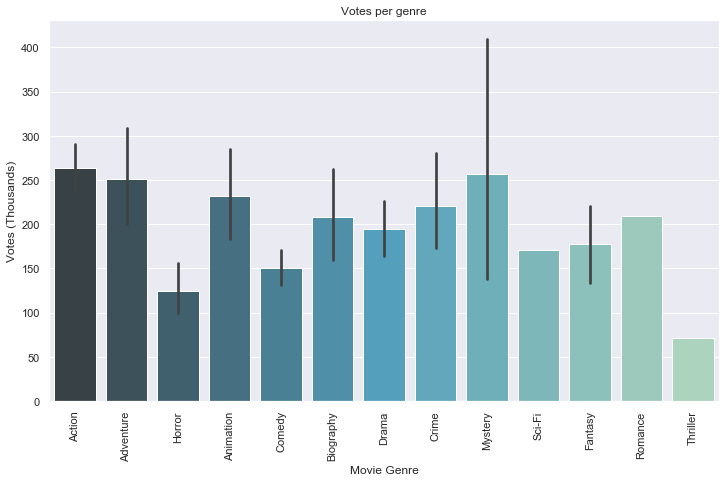

In [618]:
f, ax = plt.subplots(figsize=(12,7))
sns.barplot(x ='Genre_1', y = 'Votes (Thousands)',data = movies_db, palette="GnBu_d")#, order=movies_db['Votes'])

plt.title("Votes per genre")
plt.xlabel("Movie Genre")
plt.xticks(rotation = 90)

plt.show()